In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [97]:
from google.colab import drive
drive.mount('/content/drive')
path_data ="/content/drive/My Drive/Colab Notebooks/"
df = pd.read_csv(path_data + "Dữ liệu Lịch sử Hợp đồng Tương lai Vàng.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,29/12/2023,2081.4,2087.2,2087.2,2080.8,0.06K,-0.56%
1,28/12/2023,2093.1,2109.1,2118,2094.6,8.11K,0.00%
2,27/12/2023,2093.1,2079.3,2095.8,2072.8,128.18K,1.13%
3,26/12/2023,2069.8,2066,2080.5,2065.1,79.57K,0.03%
4,22/12/2023,2069.1,2061.2,2083,2058.2,170.15K,0.87%


In [98]:
df.columns = ['Date', 'final', 'Open', 'High', 'Low', 'KL', "Change"]
df = df.drop(['KL','Change'], axis=1)
df.head()

,Date,final,Open,High,Low
0,29/12/2023,2081.4,2087.2,2087.2,2080.8
1,28/12/2023,2093.1,2109.1,2118,2094.6
2,27/12/2023,2093.1,2079.3,2095.8,2072.8
3,26/12/2023,2069.8,2066,2080.5,2065.1
4,22/12/2023,2069.1,2061.2,2083,2058.2


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6077 entries, 0 to 6076
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    6077 non-null   object
 1   final   6077 non-null   object
 2   Open    6077 non-null   object
 3   High    6077 non-null   object
 4   Low     6077 non-null   object
dtypes: object(5)
memory usage: 237.5+ KB


In [100]:
df['Date']= pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['final'] = pd.to_numeric(df['final'].str.replace(',', ''), errors='coerce')
df['Open'] = pd.to_numeric(df['Open'].str.replace(',', ''), errors='coerce')
df['High'] = pd.to_numeric(df['High'].str.replace(',', ''), errors='coerce')
df['Low'] = pd.to_numeric(df['Low'].str.replace(',', ''), errors='coerce')

In [101]:
df.describe()

,Date,final,Open,High,Low
count,6077,6077.000000,6077.000000,6077.000000,6077.000000
mean,2012-01-29 00:27:29.234819840,1091.544677,1091.663897,1099.680698,1083.156475
min,2000-01-04 00:00:00,256.600000,256.600000,258.400000,255.100000
25%,2006-02-03 00:00:00,553.500000,553.100000,557.200000,546.500000
50%,2012-02-07 00:00:00,1213.400000,1213.500000,1220.900000,1204.300000
75%,2018-02-09 00:00:00,1516.900000,1518.300000,1530.300000,1505.200000
max,2023-12-29 00:00:00,2093.100000,2109.100000,2152.300000,2094.600000
std,NaN,541.995194,542.235830,545.653705,538.326845


In [102]:
df1 = pd.DataFrame(df,columns = ['Date', 'final'])
# df1.index = df1['Date']
# df1.drop(['Date'], axis=1, inplace = True)
df1.set_index('Date', drop=True, inplace=True)
df1 = df1[::-1]

In [103]:
df1

,final
Date,
2000-01-04,283.7
2000-01-05,282.1
2000-01-06,282.4
2000-01-07,282.9
2000-01-10,282.7
...,...
2023-12-22,2069.1
2023-12-26,2069.8
2023-12-27,2093.1


In [104]:
data = df1.values
train_data = data[:5000]
test_data = data[5000:]
# train_size = int(len(data) * 0.8)

# train_data = data[:train_size]
# test_data = data[train_size:]

In [107]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
train_data_scaled = sc.fit_transform(train_data)

In [108]:
X_train, y_train = [], []
for i in range(60, len(train_data)):
  X_train.append(train_data_scaled[i-60:i, 0])
  y_train.append(train_data_scaled[i, 0])

In [109]:
X_train

[array([0.01657188, 0.01559347, 0.01577692, 0.01608268, 0.01596037,
        0.01699994, 0.01657188, 0.01742799, 0.01730569, 0.02017978,
        0.02060784, 0.01999633, 0.02024093, 0.01926252, 0.01834526,
        0.01828411, 0.01865101, 0.01797835, 0.01810065, 0.01761145,
        0.01901792, 0.02036324, 0.03448908, 0.02929126, 0.02757904,
        0.03179845, 0.03797468, 0.03485599, 0.03326607, 0.02904666,
        0.02959702, 0.02886321, 0.03100349, 0.03124809, 0.02800709,
        0.02708983, 0.02323733, 0.02299272, 0.02299272, 0.02244237,
        0.02024093, 0.02060784, 0.02005748, 0.02268697, 0.02066899,
        0.02207546, 0.02042439, 0.02134165, 0.02024093, 0.02017978,
        0.01858986, 0.01736684, 0.01828411, 0.02066899, 0.01938482,
        0.01761145, 0.01742799, 0.01461506, 0.01400355, 0.01180212]),
 array([0.01559347, 0.01577692, 0.01608268, 0.01596037, 0.01699994,
        0.01657188, 0.01742799, 0.01730569, 0.02017978, 0.02060784,
        0.01999633, 0.02024093, 0.01926252, 0.

In [110]:
y_train

[0.013758943313153554,
 0.015165413074053669,
 0.014553904482357938,
 0.018345257750871397,
 0.01663303369412339,
 0.01596037424325808,
 0.01583807252491895,
 0.01675533541246252,
 0.01657188283495381,
 0.01644958111661468,
 0.016266128539105945,
 0.017122240567479963,
 0.016877637130801676,
 0.016143826820766816,
 0.01583807252491895,
 0.015226563933223247,
 0.015043111355714511,
 0.01418699932734055,
 0.01253592612976212,
 0.013330887298966532,
 0.0110683055096924,
 0.011129456368861979,
 0.012474775270592542,
 0.013758943313153554,
 0.015043111355714511,
 0.014370451904849257,
 0.012841680425609986,
 0.013208585580627374,
 0.01351433987647524,
 0.012169020974744676,
 0.012413624411422935,
 0.012107870115575098,
 0.011985568397235968,
 0.010517947777166248,
 0.010456796917996669,
 0.011007154650522849,
 0.011985568397235968,
 0.0110683055096924,
 0.010517947777166248,
 0.008622271142909532,
 0.0095395340304531,
 0.011557512383048973,
 0.011129456368861979,
 0.011496361523879367,
 0.0

In [111]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))




In [112]:
X_train.shape

(4940, 60, 1)

In [114]:
y_train.shape

(4940, 1)

In [116]:
!pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units = 64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [117]:

save_model = "save_model.keras"
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')
model.fit(X_train, y_train, epochs=10, batch_size=60, verbose = 2, callbacks=[best_model])

Epoch 1/10

Epoch 1: loss improved from inf to 0.01810, saving model to save_model.keras
83/83 - 29s - 350ms/step - loss: 0.0181
Epoch 2/10

Epoch 2: loss improved from 0.01810 to 0.00507, saving model to save_model.keras
83/83 - 15s - 178ms/step - loss: 0.0051
Epoch 3/10

Epoch 3: loss improved from 0.00507 to 0.00436, saving model to save_model.keras
83/83 - 20s - 236ms/step - loss: 0.0044
Epoch 4/10

Epoch 4: loss improved from 0.00436 to 0.00430, saving model to save_model.keras
83/83 - 21s - 257ms/step - loss: 0.0043
Epoch 5/10

Epoch 5: loss improved from 0.00430 to 0.00391, saving model to save_model.keras
83/83 - 21s - 249ms/step - loss: 0.0039
Epoch 6/10

Epoch 6: loss did not improve from 0.00391
83/83 - 21s - 255ms/step - loss: 0.0040
Epoch 7/10

Epoch 7: loss improved from 0.00391 to 0.00356, saving model to save_model.keras
83/83 - 15s - 178ms/step - loss: 0.0036
Epoch 8/10

Epoch 8: loss improved from 0.00356 to 0.00320, saving model to save_model.keras
83/83 - 20s - 246m

In [118]:
from tensorflow.keras.models import load_model
y_train = sc.inverse_transform(y_train)
final_model = load_model('save_model.keras')
y_train_pred = final_model.predict(X_train)
y_train_pred = sc.inverse_transform(y_train_pred)

155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step


In [119]:
final_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 348,101 (1.33 MB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 232,068 (906.52 KB)

In [120]:
test = df1[len(train_data)-60:].values

test = test.reshape(-1,1)
sc_test = sc.transform(test)

X_test = []
for i in range(60, test.shape[0]):
  X_test.append(sc_test[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

y_test = data[5000:]
y_test_pred = final_model.predict(X_test)
y_test_pred = sc.inverse_transform(y_test_pred)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step


In [121]:
test

array([[1478.3],
       [1513.2],
       [1503.1],
       ...,
       [2093.1],
       [2093.1],
       [2081.4]])

<ipython-input-123-eb7c2fe8ef01>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['prediction'] = y_train_pred
<ipython-input-123-eb7c2fe8ef01>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['prediction'] = y_test_pred


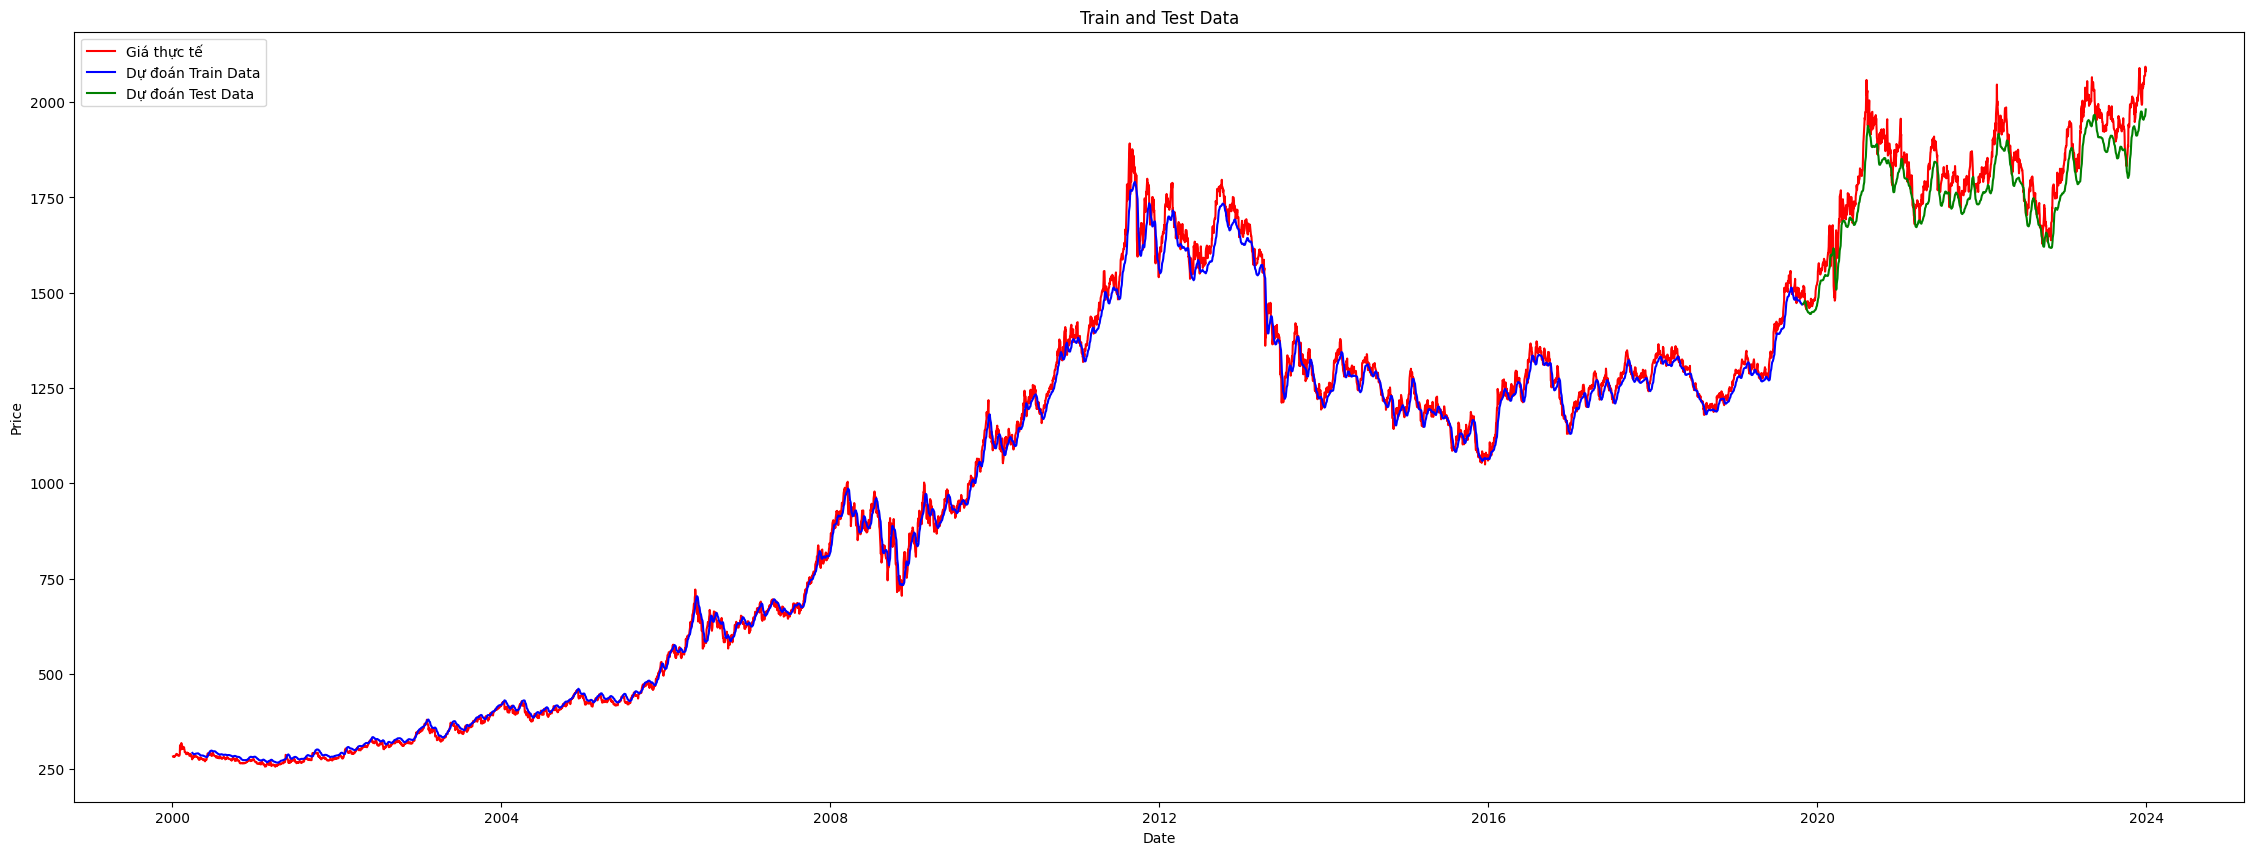

In [123]:
train_data1 = df1[60:5000]
test_data1 = df1[5000:]

plt.figure(figsize=(28, 10))

plt.plot(df1, label='Giá thực tế',color = 'red')
train_data1['prediction'] = y_train_pred
test_data1['prediction'] = y_test_pred

plt.plot(train_data1['prediction'], label='Dự đoán Train Data', color='blue')
plt.plot(test_data1['prediction'], label='Dự đoán Test Data', color='green')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Train and Test Data')
plt.legend()
plt.show()

In [141]:
print("Sai số tuyệt đối trung bình tập train:",mean_squared_error(y_train, y_train_pred))
print("Độ phù hợp tập train:",r2_score(y_train, y_train_pred))
print(f"Phần trăm sai số tuyệt đối của trung bình của tập train: {round(mean_absolute_percentage_error(y_train, y_train_pred)*100,4)}%")

Sai số tuyệt đối trung bình tập train: 709.6986563480963
Độ phù hợp tập train: 0.9966470784240582
Phần trăm sai số tuyệt đối của trung bình của tập train: 2.0887%


In [143]:
print("Sai số tuyệt đối trung bình tập test:",mean_squared_error(y_test, y_test_pred))
print("Độ phù hợp tập test:",r2_score(y_test, y_test_pred))
print(f"Phần trăm sai số tuyệt đối của trung bình của tập test: {round(mean_absolute_percentage_error(y_test, y_test_pred)*100,4)}%")

Sai số tuyệt đối trung bình tập test: 4034.1504626965207
Độ phù hợp tập test: 0.7736384127454855
Phần trăm sai số tuyệt đối của trung bình của tập test: 2.9916%


In [144]:
test_data1

,final,prediction
Date,,
2019-10-29,1490.7,1470.574463
2019-10-30,1500.2,1470.863037
2019-10-31,1518.3,1471.341309
2019-11-01,1514.9,1472.932495
2019-11-04,1514.7,1475.067383
...,...,...
2023-12-22,2069.1,1960.011353
2023-12-26,2069.8,1963.979126
2023-12-27,2093.1,1968.578003
